In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('train_Int_MM_PCA10.csv')
Validation_data = pd.read_csv('valid_Int_MM_PCA10.csv')
Test_data = pd.read_csv('test_Int_MM_PCA10.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PC1           12000 non-null  float64
 1   PC2           12000 non-null  float64
 2   PC3           12000 non-null  float64
 3   PC4           12000 non-null  float64
 4   PC5           12000 non-null  float64
 5   PC6           12000 non-null  float64
 6   PC7           12000 non-null  float64
 7   PC8           12000 non-null  float64
 8   PC9           12000 non-null  float64
 9   PC10          12000 non-null  float64
 10  LoanApproved  12000 non-null  int64  
 11  RiskScore     12000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


In [3]:
Train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,LoanApproved,RiskScore
0,-0.412651,0.084070,0.282497,-0.393422,-0.096729,0.393599,-0.103436,0.098373,-0.313217,-0.013963,0,0.402174
1,-0.177765,0.031694,0.220924,0.010606,-0.042096,-0.534258,0.271329,0.394487,-0.065318,0.194361,0,0.384058
2,0.075381,-0.140127,-0.233611,0.085018,-0.253664,-0.209153,-0.191823,0.494242,-0.014001,-0.162745,0,0.438406
3,0.598926,-0.202996,0.054273,-0.085612,0.062239,0.238759,-0.549828,-0.151805,0.010526,0.218146,1,0.086957
4,0.089788,-0.029277,0.082159,-0.036563,-0.274682,-0.538689,-0.136742,-0.148616,0.186355,-0.124186,0,0.438406


In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0

In [6]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [7]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [8]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [9]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [10]:
print(y_training)

[0 0 0 ... 1 0 0]


In [11]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [12]:
print(X_training.shape)

(12000, 10)


Training Losses are 
          0
0  0.672802
1  0.671442
2  0.670089
3  0.668744
4  0.667407
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 955    1]]
Accuracy: 0.7612, Precision: 1.0000, Recall: 0.0010, F1-score: 0.0021

Test Data
Confusion Matrix for hiden layer 8
[[3043    1]
 [ 955    1]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0010, F1-score: 0.0021



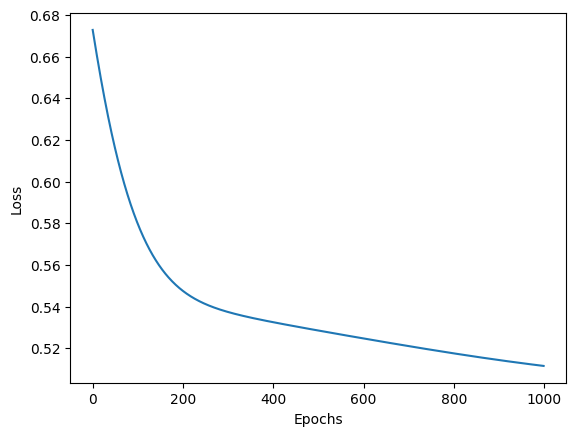

Training Losses are 
          0
0  0.695717
1  0.693060
2  0.690429
3  0.687823
4  0.685243
Validation Data
Confusion Matrix for hidden layer 16
[[3031   13]
 [ 929   27]]
Accuracy: 0.7645, Precision: 0.6750, Recall: 0.0282, F1-score: 0.0542

Test Data
Confusion Matrix for hiden layer 16
[[3025   19]
 [ 930   26]]
Accuracy: 0.7628, Precision: 0.5778, Recall: 0.0272, F1-score: 0.0519



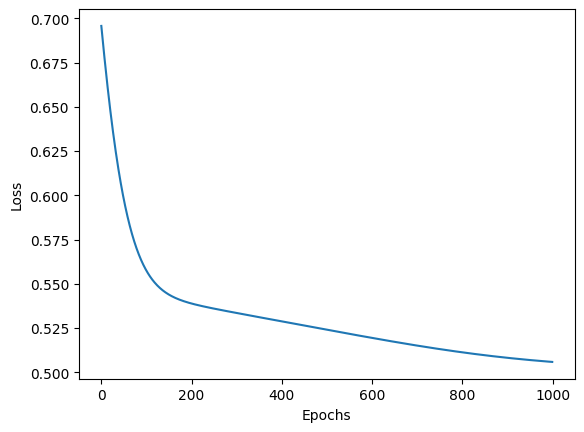

Training Losses are 
          0
0  0.782137
1  0.776288
2  0.770517
3  0.764826
4  0.759217
Validation Data
Confusion Matrix for hidden layer 32
[[2996   48]
 [ 907   49]]
Accuracy: 0.7612, Precision: 0.5052, Recall: 0.0513, F1-score: 0.0931

Test Data
Confusion Matrix for hiden layer 32
[[2998   46]
 [ 907   49]]
Accuracy: 0.7618, Precision: 0.5158, Recall: 0.0513, F1-score: 0.0932



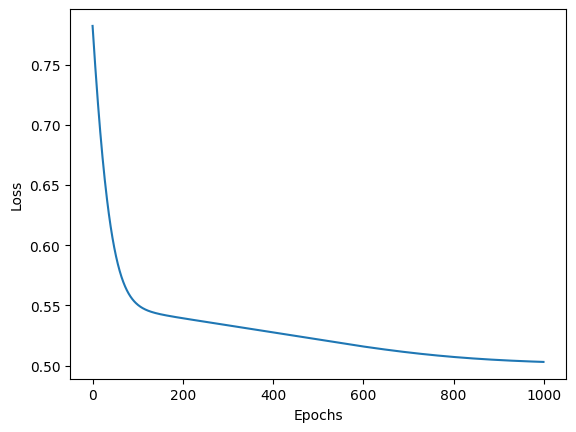

Training Losses are 
          0
0  0.618361
1  0.612394
2  0.606714
3  0.601325
4  0.596227
Validation Data
Confusion Matrix for hidden layer 64
[[2949   95]
 [ 858   98]]
Accuracy: 0.7618, Precision: 0.5078, Recall: 0.1025, F1-score: 0.1706

Test Data
Confusion Matrix for hiden layer 64
[[2946   98]
 [ 845  111]]
Accuracy: 0.7642, Precision: 0.5311, Recall: 0.1161, F1-score: 0.1906



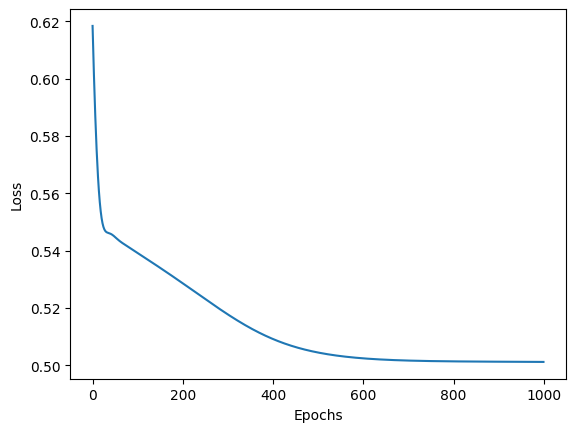

Training Losses are 
          0
0  0.778383
1  0.756465
2  0.735694
3  0.716095
4  0.697685
Validation Data
Confusion Matrix for hidden layer 128
[[2946   98]
 [ 856  100]]
Accuracy: 0.7615, Precision: 0.5051, Recall: 0.1046, F1-score: 0.1733

Test Data
Confusion Matrix for hiden layer 128
[[2944  100]
 [ 844  112]]
Accuracy: 0.7640, Precision: 0.5283, Recall: 0.1172, F1-score: 0.1918



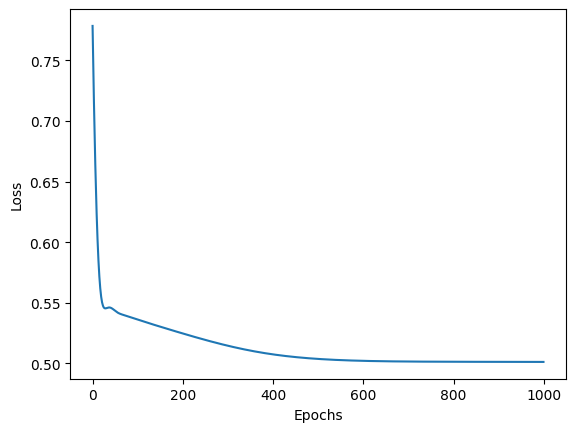

Best accuracy for test data is 0.76425 for degree 64


In [13]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(10,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [14]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.664046
1  0.662511
2  0.660987
3  0.659473
4  0.657970
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


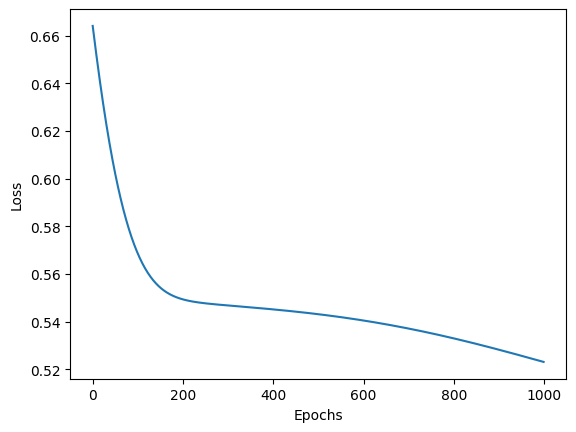

Training Losses are 
          0
0  0.723767
1  0.720590
2  0.717443
3  0.714329
4  0.711247
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


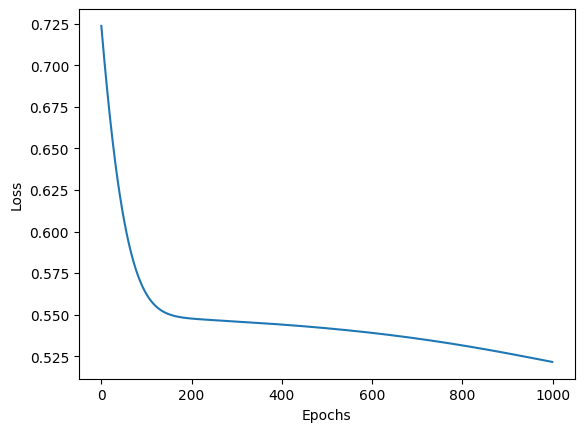

Training Losses are 
          0
0  0.793013
1  0.786056
2  0.779204
3  0.772462
4  0.765829
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3036    8]
 [ 946   10]]
Accuracy: 0.7615, Precision: 0.5556, Recall: 0.0105, F1-score: 0.0205

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3038    6]
 [ 941   15]]
Accuracy: 0.7632, Precision: 0.7143, Recall: 0.0157, F1-score: 0.0307



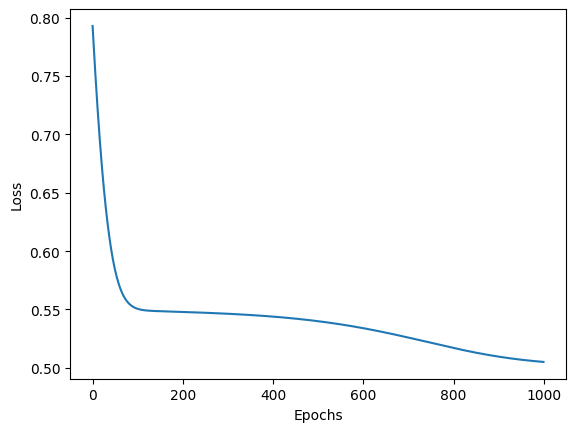

Training Losses are 
          0
0  0.567813
1  0.564730
2  0.561956
3  0.559491
4  0.557335
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2970   74]
 [ 882   74]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0774, F1-score: 0.1341

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2969   75]
 [ 875   81]]
Accuracy: 0.7625, Precision: 0.5192, Recall: 0.0847, F1-score: 0.1457



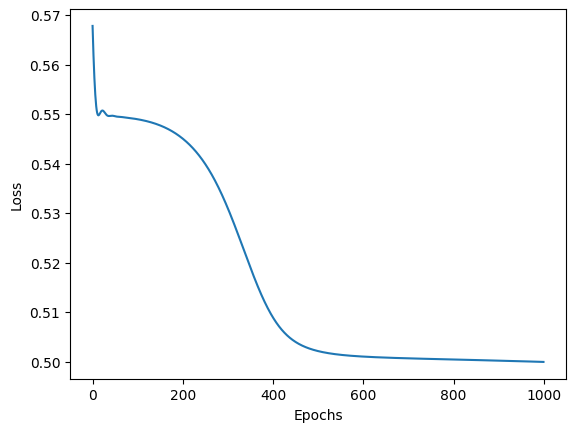

Training Losses are 
          0
0  0.715354
1  0.713680
2  0.712020
3  0.710374
4  0.708741
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


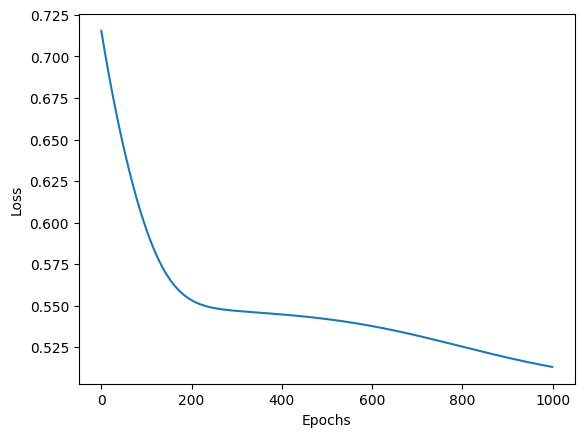

Training Losses are 
          0
0  0.734237
1  0.730433
2  0.726671
3  0.722951
4  0.719275
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


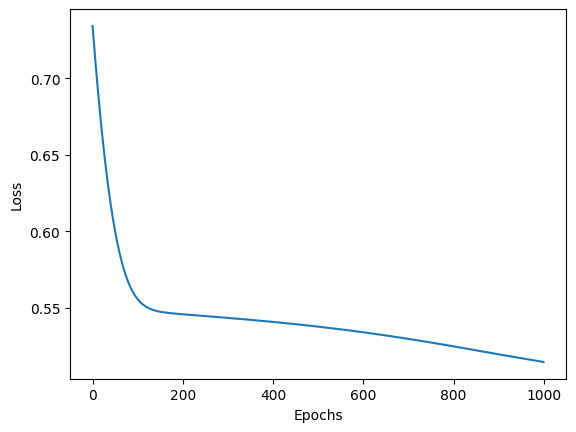

Training Losses are 
          0
0  0.807699
1  0.799356
2  0.791164
3  0.783125
4  0.775240
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3029   15]
 [ 931   25]]
Accuracy: 0.7635, Precision: 0.6250, Recall: 0.0262, F1-score: 0.0502

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3026   18]
 [ 930   26]]
Accuracy: 0.7630, Precision: 0.5909, Recall: 0.0272, F1-score: 0.0520



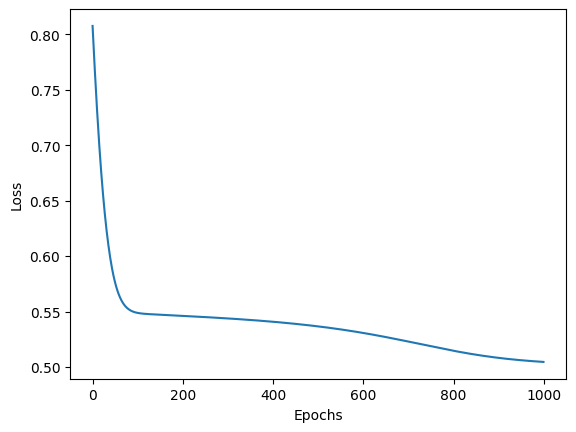

Training Losses are 
          0
0  0.608889
1  0.602163
2  0.595881
3  0.590047
4  0.584660
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2965   79]
 [ 873   83]]
Accuracy: 0.7620, Precision: 0.5123, Recall: 0.0868, F1-score: 0.1485

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2958   86]
 [ 868   88]]
Accuracy: 0.7615, Precision: 0.5057, Recall: 0.0921, F1-score: 0.1558



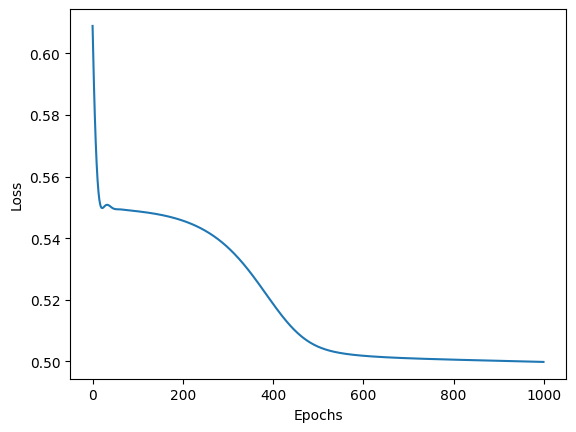

Training Losses are 
          0
0  0.719183
1  0.715700
2  0.712253
3  0.708841
4  0.705465
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


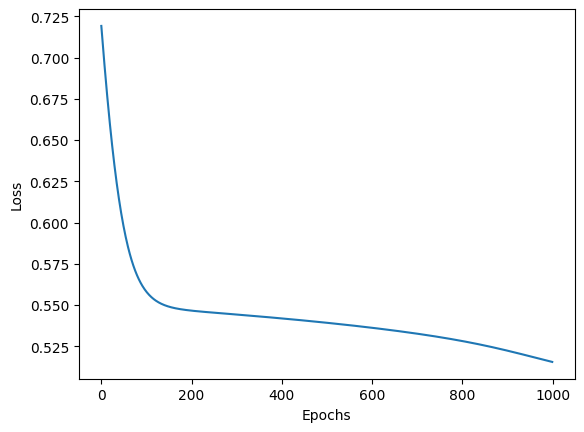

Training Losses are 
          0
0  0.971119
1  0.963035
2  0.955035
3  0.947121
4  0.939295
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


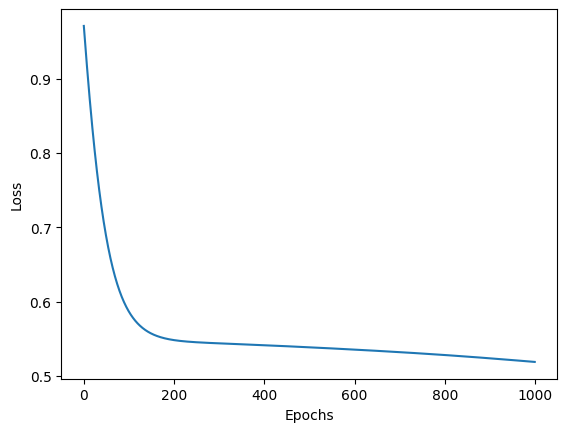

Training Losses are 
          0
0  0.733333
1  0.725439
2  0.717731
3  0.710212
4  0.702885
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2970   74]
 [ 879   77]]
Accuracy: 0.7618, Precision: 0.5099, Recall: 0.0805, F1-score: 0.1391

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2972   72]
 [ 882   74]]
Accuracy: 0.7615, Precision: 0.5068, Recall: 0.0774, F1-score: 0.1343



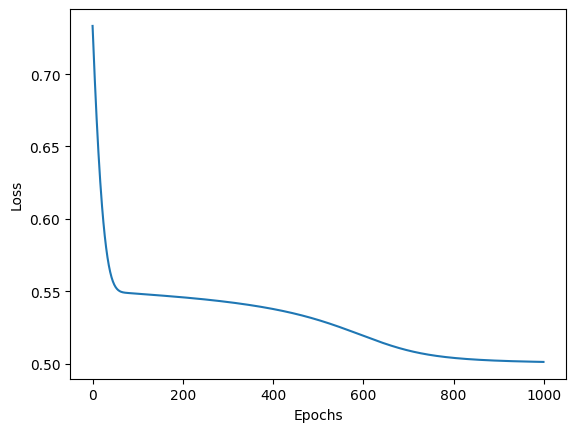

Training Losses are 
          0
0  0.597032
1  0.589794
2  0.583203
3  0.577262
4  0.571970
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2965   79]
 [ 875   81]]
Accuracy: 0.7615, Precision: 0.5062, Recall: 0.0847, F1-score: 0.1452

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2960   84]
 [ 866   90]]
Accuracy: 0.7625, Precision: 0.5172, Recall: 0.0941, F1-score: 0.1593



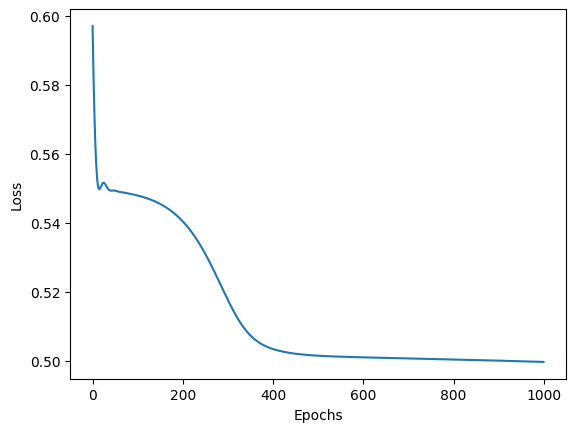

Training Losses are 
          0
0  0.587484
1  0.585996
2  0.584534
3  0.583098
4  0.581690
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3034   10]
 [ 941   15]]
Accuracy: 0.7622, Precision: 0.6000, Recall: 0.0157, F1-score: 0.0306

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3035    9]
 [ 945   11]]
Accuracy: 0.7615, Precision: 0.5500, Recall: 0.0115, F1-score: 0.0225



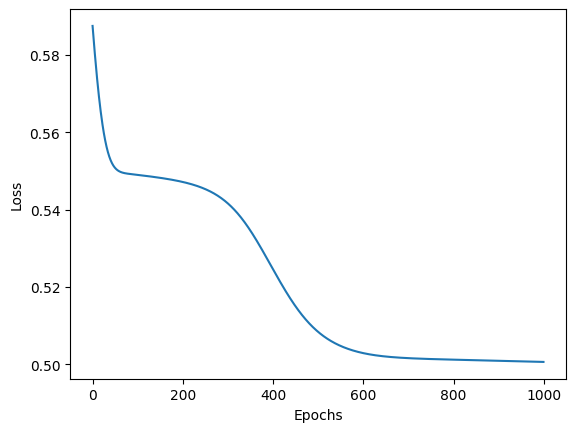

Training Losses are 
          0
0  0.679942
1  0.673752
2  0.667733
3  0.661889
4  0.656223
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2966   78]
 [ 875   81]]
Accuracy: 0.7618, Precision: 0.5094, Recall: 0.0847, F1-score: 0.1453

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2962   82]
 [ 871   85]]
Accuracy: 0.7618, Precision: 0.5090, Recall: 0.0889, F1-score: 0.1514



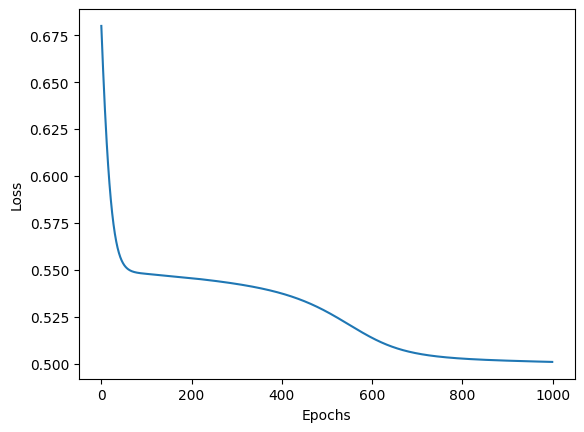

Training Losses are 
          0
0  0.649844
1  0.641220
2  0.633025
3  0.625267
4  0.617949
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2967   77]
 [ 879   77]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0805, F1-score: 0.1387

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2965   79]
 [ 868   88]]
Accuracy: 0.7632, Precision: 0.5269, Recall: 0.0921, F1-score: 0.1567



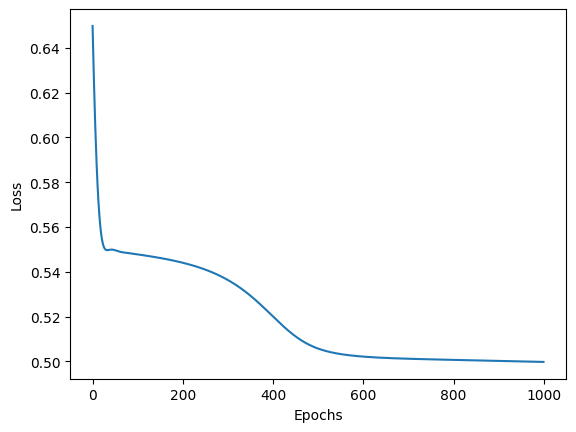

Training Losses are 
          0
0  0.591474
1  0.583444
2  0.576329
3  0.570131
4  0.564838
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2968   76]
 [ 881   75]]
Accuracy: 0.7608, Precision: 0.4967, Recall: 0.0785, F1-score: 0.1355

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2970   74]
 [ 875   81]]
Accuracy: 0.7628, Precision: 0.5226, Recall: 0.0847, F1-score: 0.1458



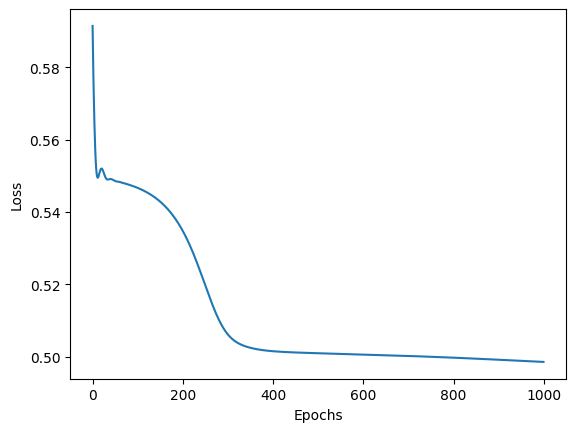

Best accuracy for test data is 0.76325 for degree 8 & 32


In [15]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(10,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [16]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.737237
1  0.735111
2  0.732998
3  0.730897
4  0.728810
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


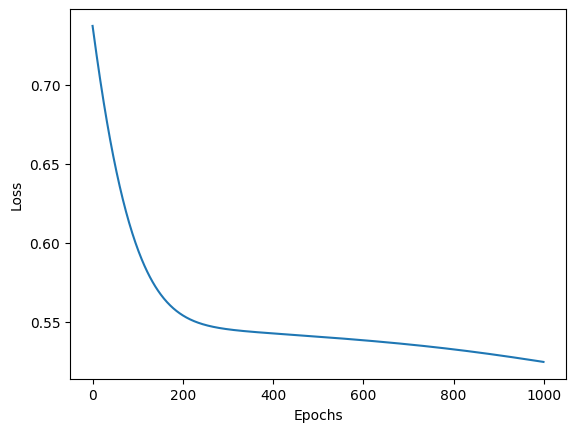

Training Losses are 
          0
0  0.793219
1  0.790946
2  0.788685
3  0.786438
4  0.784204
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


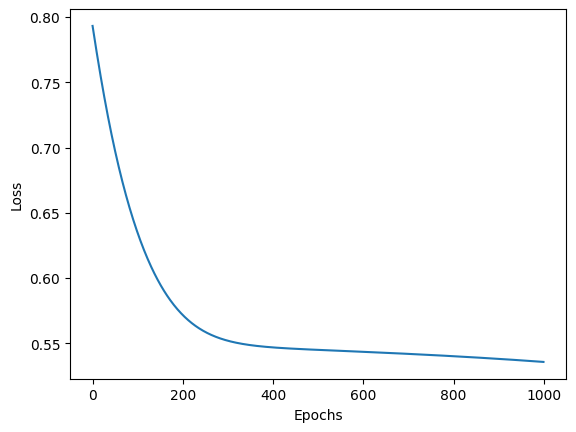

Training Losses are 
          0
0  0.658253
1  0.656812
2  0.655383
3  0.653965
4  0.652559
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


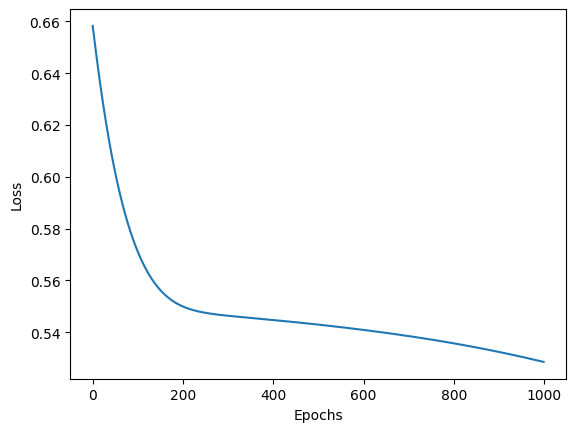

Training Losses are 
          0
0  0.552216
1  0.551980
2  0.551754
3  0.551538
4  0.551331
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2971   73]
 [ 882   74]]
Accuracy: 0.7612, Precision: 0.5034, Recall: 0.0774, F1-score: 0.1342

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2974   70]
 [ 884   72]]
Accuracy: 0.7615, Precision: 0.5070, Recall: 0.0753, F1-score: 0.1311



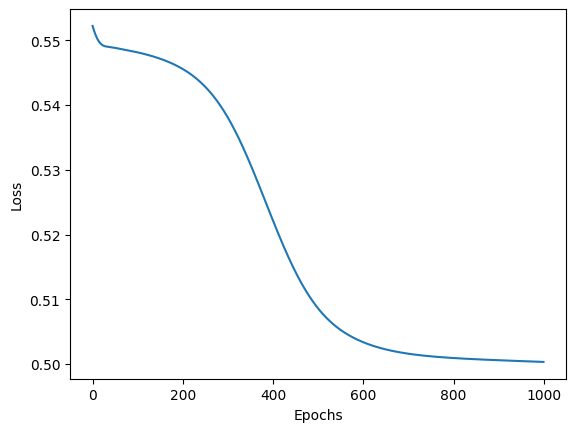

Training Losses are 
          0
0  0.597373
1  0.595678
2  0.594015
3  0.592386
4  0.590792
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2995   49]
 [ 903   53]]
Accuracy: 0.7620, Precision: 0.5196, Recall: 0.0554, F1-score: 0.1002

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3001   43]
 [ 904   52]]
Accuracy: 0.7632, Precision: 0.5474, Recall: 0.0544, F1-score: 0.0990



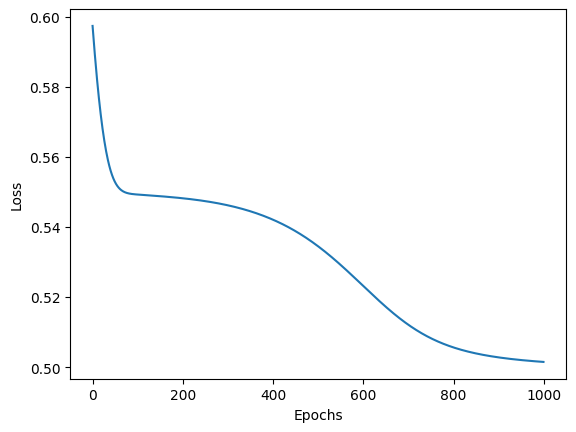

Training Losses are 
          0
0  0.604226
1  0.602359
2  0.600526
3  0.598727
4  0.596963
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[2994   50]
 [ 902   54]]
Accuracy: 0.7620, Precision: 0.5192, Recall: 0.0565, F1-score: 0.1019

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[2998   46]
 [ 903   53]]
Accuracy: 0.7628, Precision: 0.5354, Recall: 0.0554, F1-score: 0.1005



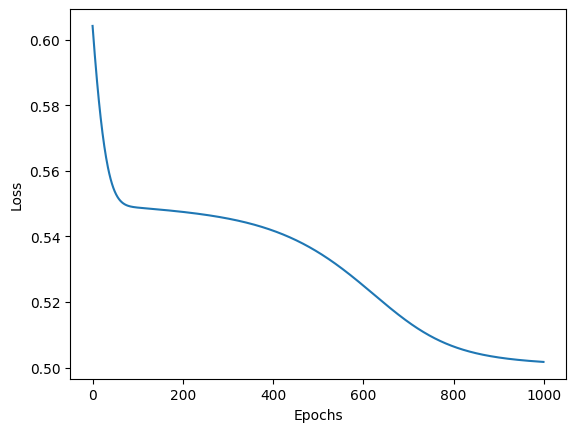

Training Losses are 
          0
0  0.725340
1  0.722223
2  0.719136
3  0.716079
4  0.713053
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


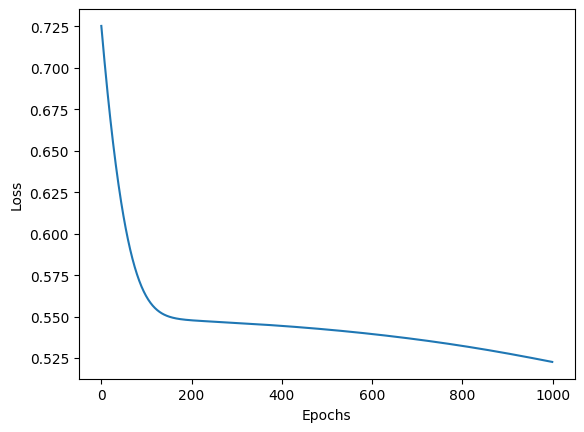

Training Losses are 
          0
0  0.648094
1  0.645701
2  0.643339
3  0.641008
4  0.638709
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3034   10]
 [ 938   18]]
Accuracy: 0.7630, Precision: 0.6429, Recall: 0.0188, F1-score: 0.0366

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3036    8]
 [ 938   18]]
Accuracy: 0.7635, Precision: 0.6923, Recall: 0.0188, F1-score: 0.0367



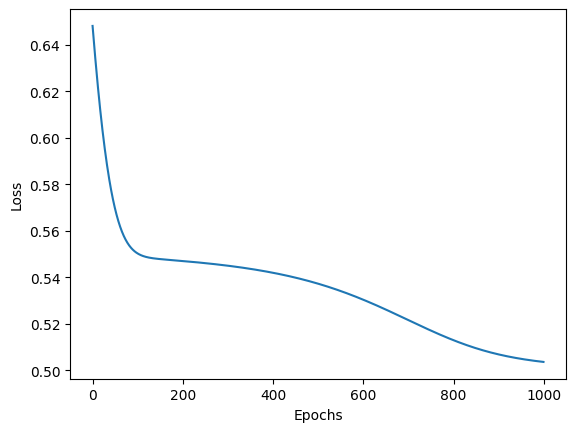

Training Losses are 
          0
0  0.731489
1  0.725429
2  0.719483
3  0.713650
4  0.707934
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3011   33]
 [ 919   37]]
Accuracy: 0.7620, Precision: 0.5286, Recall: 0.0387, F1-score: 0.0721

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3017   27]
 [ 920   36]]
Accuracy: 0.7632, Precision: 0.5714, Recall: 0.0377, F1-score: 0.0707



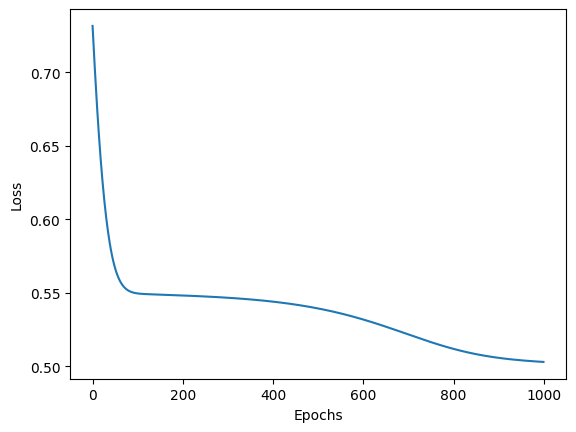

Training Losses are 
          0
0  0.619213
1  0.615700
2  0.612284
3  0.608967
4  0.605751
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2982   62]
 [ 887   69]]
Accuracy: 0.7628, Precision: 0.5267, Recall: 0.0722, F1-score: 0.1270

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2990   54]
 [ 897   59]]
Accuracy: 0.7622, Precision: 0.5221, Recall: 0.0617, F1-score: 0.1104



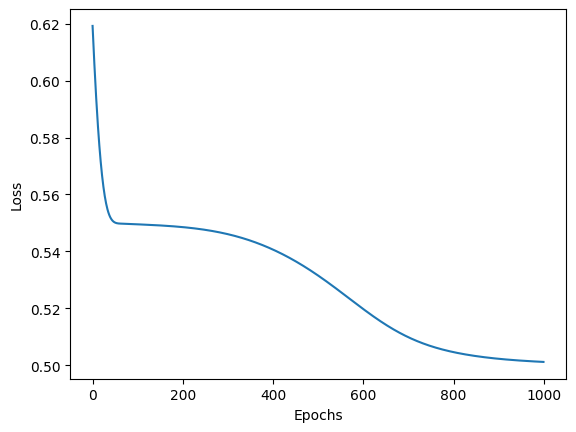

Training Losses are 
          0
0  0.930394
1  0.921135
2  0.911995
3  0.902977
4  0.894083
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


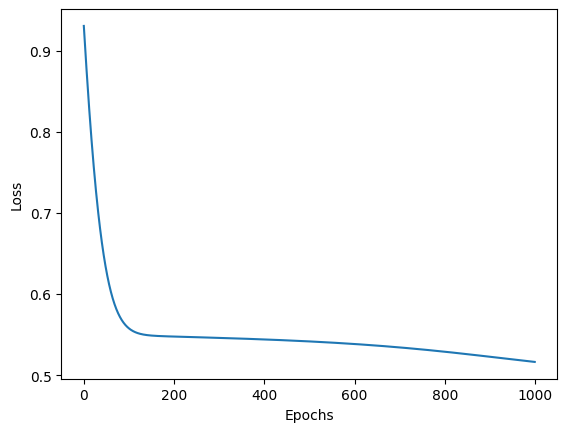

Training Losses are 
          0
0  0.647973
1  0.643744
2  0.639616
3  0.635589
4  0.631664
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2991   53]
 [ 896   60]]
Accuracy: 0.7628, Precision: 0.5310, Recall: 0.0628, F1-score: 0.1123

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2993   51]
 [ 902   54]]
Accuracy: 0.7618, Precision: 0.5143, Recall: 0.0565, F1-score: 0.1018



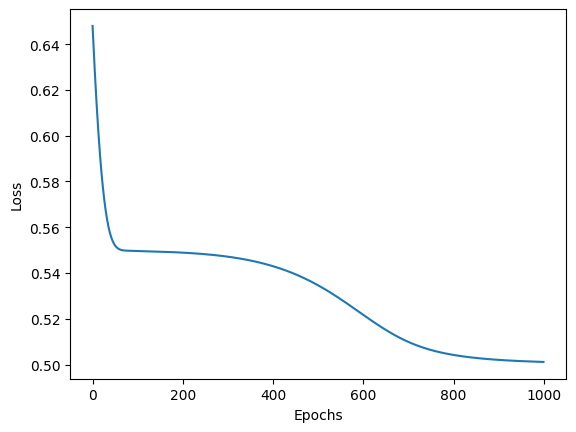

Training Losses are 
          0
0  0.775989
1  0.764307
2  0.752945
3  0.741910
4  0.731207
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2982   62]
 [ 886   70]]
Accuracy: 0.7630, Precision: 0.5303, Recall: 0.0732, F1-score: 0.1287

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2985   59]
 [ 894   62]]
Accuracy: 0.7618, Precision: 0.5124, Recall: 0.0649, F1-score: 0.1151



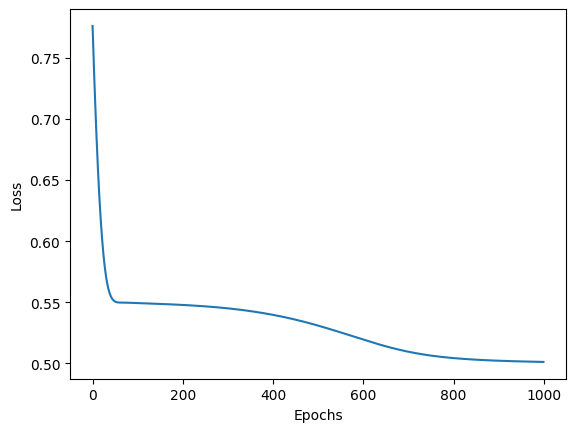

Training Losses are 
          0
0  0.609579
1  0.603518
2  0.597812
3  0.592463
4  0.587473
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2972   72]
 [ 879   77]]
Accuracy: 0.7622, Precision: 0.5168, Recall: 0.0805, F1-score: 0.1394

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2975   69]
 [ 883   73]]
Accuracy: 0.7620, Precision: 0.5141, Recall: 0.0764, F1-score: 0.1330



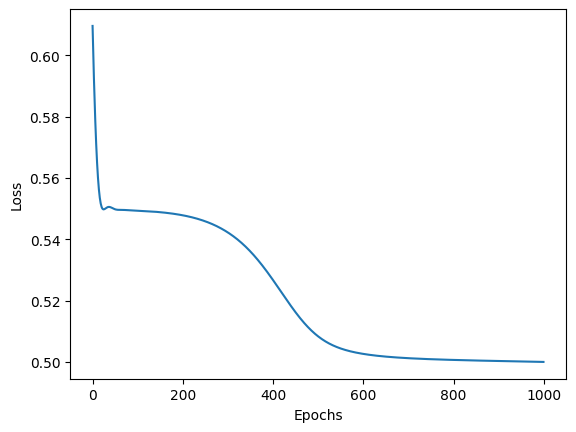

Training Losses are 
          0
0  0.698583
1  0.688920
2  0.679608
3  0.670652
4  0.662058
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2969   75]
 [ 879   77]]
Accuracy: 0.7615, Precision: 0.5066, Recall: 0.0805, F1-score: 0.1390

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2977   67]
 [ 883   73]]
Accuracy: 0.7625, Precision: 0.5214, Recall: 0.0764, F1-score: 0.1332



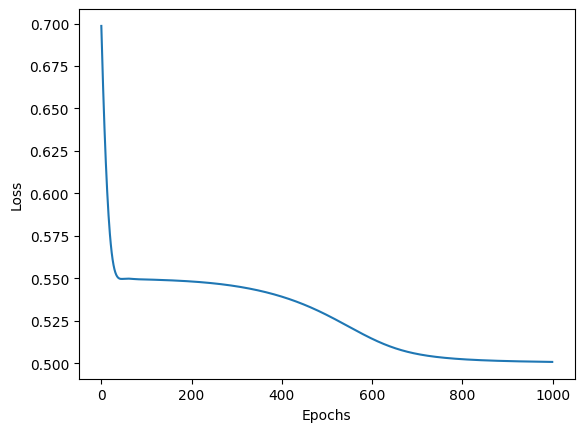

Training Losses are 
          0
0  0.789140
1  0.776431
2  0.764090
3  0.752125
4  0.740542
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2986   58]
 [ 893   63]]
Accuracy: 0.7622, Precision: 0.5207, Recall: 0.0659, F1-score: 0.1170

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2987   57]
 [ 897   59]]
Accuracy: 0.7615, Precision: 0.5086, Recall: 0.0617, F1-score: 0.1101



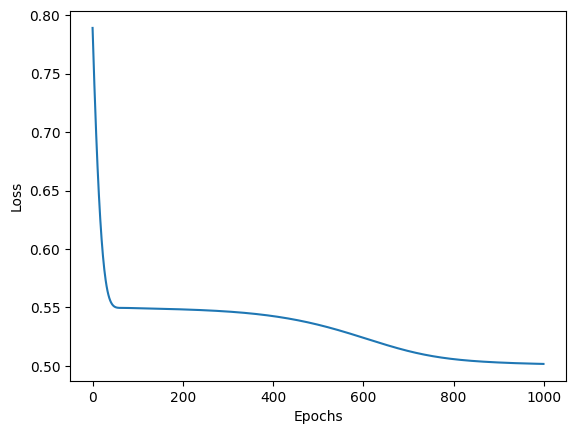

Training Losses are 
          0
0  0.635859
1  0.634258
2  0.632670
3  0.631098
4  0.629541
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


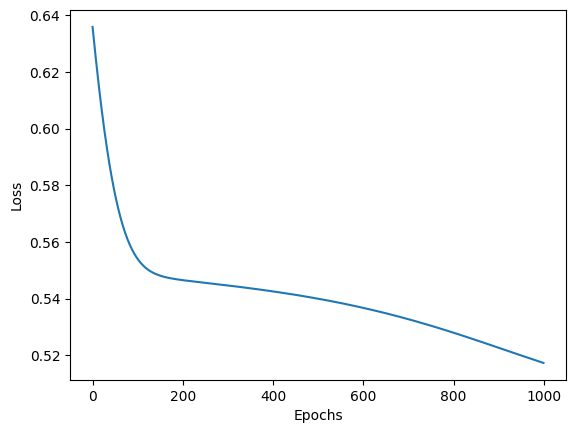

Training Losses are 
          0
0  0.653499
1  0.651973
2  0.650459
3  0.648956
4  0.647466
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


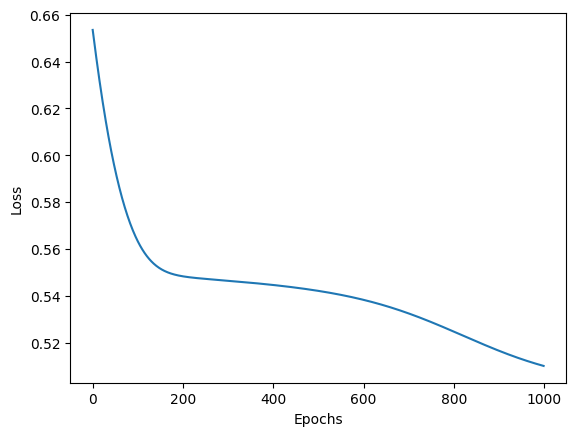

Training Losses are 
          0
0  0.638869
1  0.637249
2  0.635642
3  0.634048
4  0.632466
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


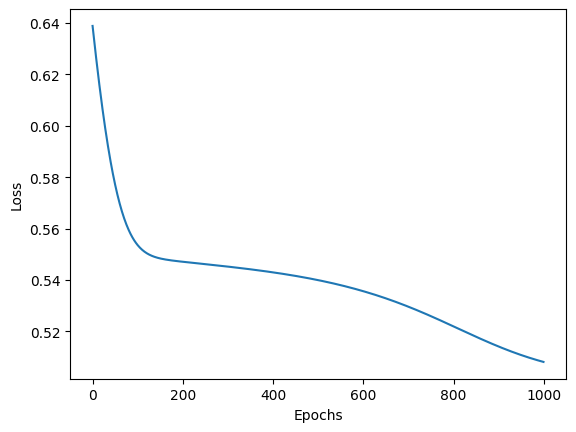

Training Losses are 
          0
0  0.628593
1  0.627041
2  0.625504
3  0.623982
4  0.622477
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [ 955    1]]
Accuracy: 0.7612, Precision: 1.0000, Recall: 0.0010, F1-score: 0.0021

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3043    1]
 [ 955    1]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0010, F1-score: 0.0021



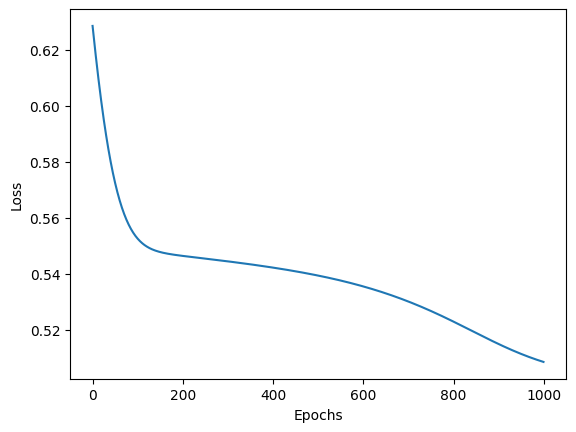

Training Losses are 
          0
0  0.816252
1  0.811130
2  0.806056
3  0.801031
4  0.796055
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


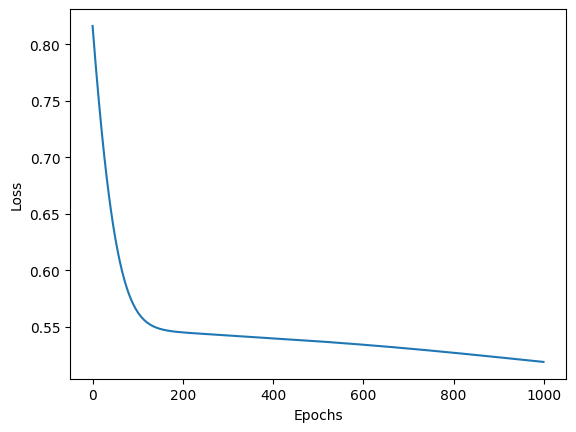

Training Losses are 
          0
0  0.630636
1  0.628107
2  0.625622
3  0.623181
4  0.620786
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2984   60]
 [ 888   68]]
Accuracy: 0.7630, Precision: 0.5312, Recall: 0.0711, F1-score: 0.1255

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2985   59]
 [ 896   60]]
Accuracy: 0.7612, Precision: 0.5042, Recall: 0.0628, F1-score: 0.1116



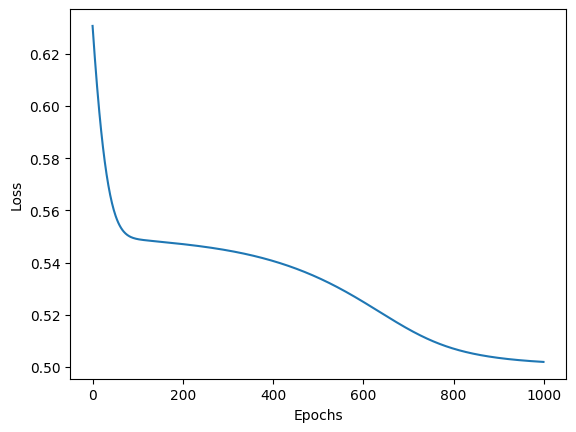

Training Losses are 
          0
0  0.661224
1  0.658188
2  0.655198
3  0.652253
4  0.649355
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2998   46]
 [ 907   49]]
Accuracy: 0.7618, Precision: 0.5158, Recall: 0.0513, F1-score: 0.0932

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3004   40]
 [ 908   48]]
Accuracy: 0.7630, Precision: 0.5455, Recall: 0.0502, F1-score: 0.0920



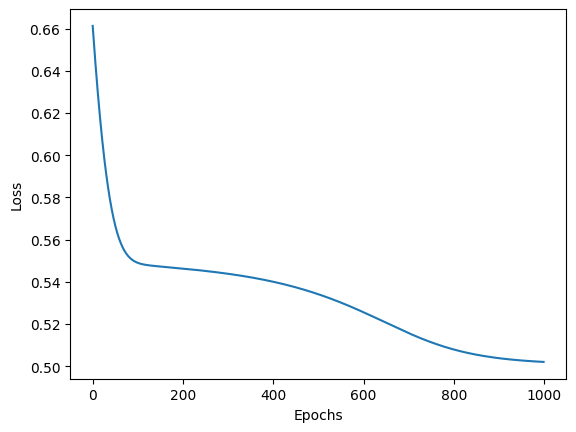

Training Losses are 
          0
0  0.649523
1  0.646655
2  0.643828
3  0.641045
4  0.638304
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3030   14]
 [ 931   25]]
Accuracy: 0.7638, Precision: 0.6410, Recall: 0.0262, F1-score: 0.0503

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3025   19]
 [ 928   28]]
Accuracy: 0.7632, Precision: 0.5957, Recall: 0.0293, F1-score: 0.0558



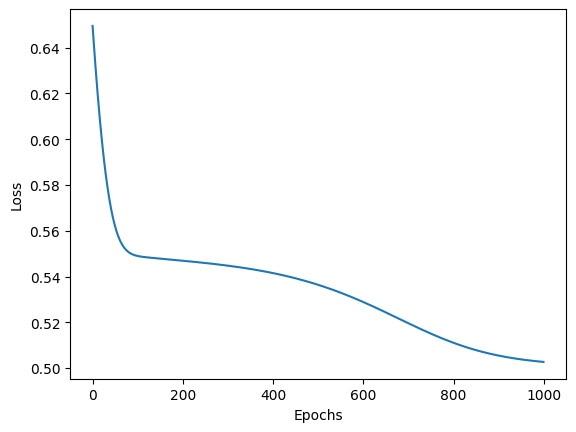

Training Losses are 
          0
0  0.590504
1  0.587449
2  0.584519
3  0.581716
4  0.579040
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2970   74]
 [ 880   76]]
Accuracy: 0.7615, Precision: 0.5067, Recall: 0.0795, F1-score: 0.1374

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2972   72]
 [ 880   76]]
Accuracy: 0.7620, Precision: 0.5135, Recall: 0.0795, F1-score: 0.1377



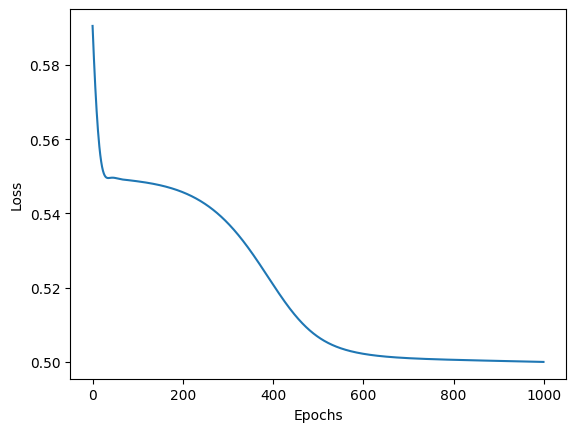

Training Losses are 
          0
0  0.674031
1  0.668260
2  0.662638
3  0.657167
4  0.651848
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2984   60]
 [ 888   68]]
Accuracy: 0.7630, Precision: 0.5312, Recall: 0.0711, F1-score: 0.1255

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2984   60]
 [ 895   61]]
Accuracy: 0.7612, Precision: 0.5041, Recall: 0.0638, F1-score: 0.1133



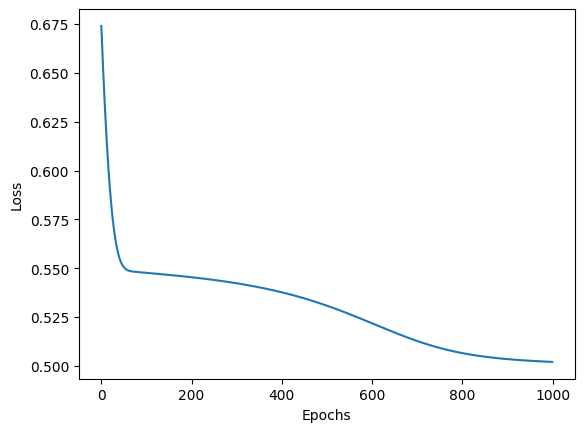

Training Losses are 
          0
0  0.661890
1  0.656647
2  0.651539
3  0.646567
4  0.641734
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2968   76]
 [ 874   82]]
Accuracy: 0.7625, Precision: 0.5190, Recall: 0.0858, F1-score: 0.1472

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2964   80]
 [ 873   83]]
Accuracy: 0.7618, Precision: 0.5092, Recall: 0.0868, F1-score: 0.1483



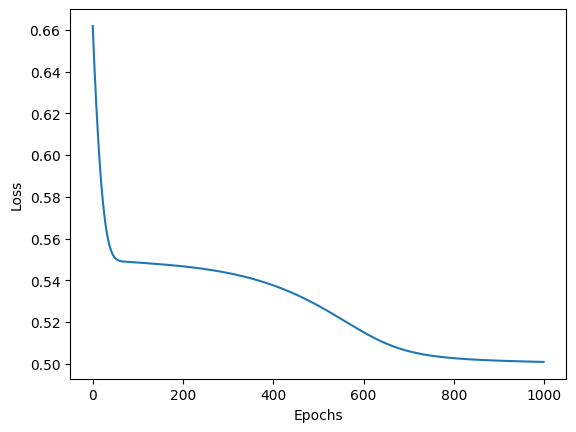

Training Losses are 
          0
0  0.654172
1  0.649019
2  0.644008
3  0.639139
4  0.634415
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2967   77]
 [ 875   81]]
Accuracy: 0.7620, Precision: 0.5127, Recall: 0.0847, F1-score: 0.1454

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2966   78]
 [ 871   85]]
Accuracy: 0.7628, Precision: 0.5215, Recall: 0.0889, F1-score: 0.1519



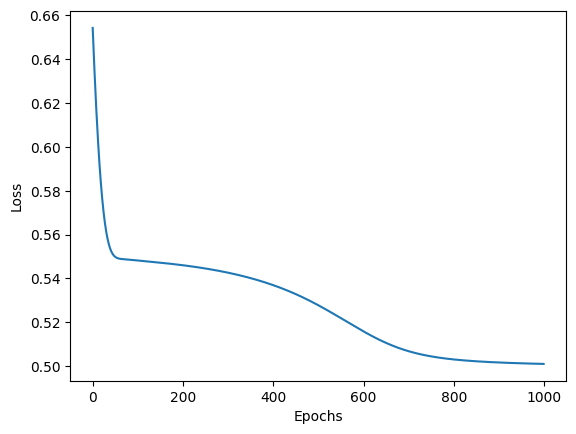

Training Losses are 
          0
0  0.734814
1  0.722511
2  0.710654
3  0.699251
4  0.688308
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2983   61]
 [ 888   68]]
Accuracy: 0.7628, Precision: 0.5271, Recall: 0.0711, F1-score: 0.1253

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2985   59]
 [ 898   58]]
Accuracy: 0.7608, Precision: 0.4957, Recall: 0.0607, F1-score: 0.1081



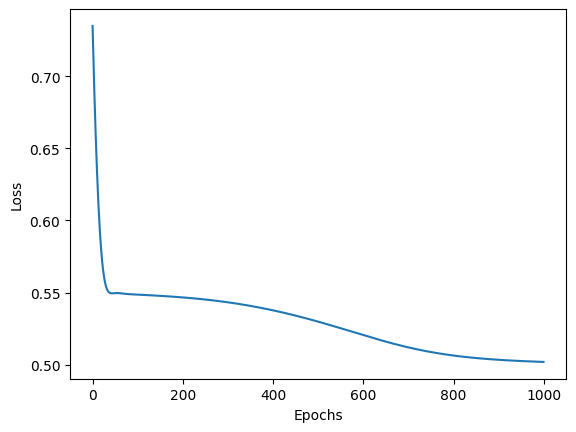

Training Losses are 
          0
0  0.583450
1  0.578658
2  0.574259
3  0.570256
4  0.566648
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2970   74]
 [ 881   75]]
Accuracy: 0.7612, Precision: 0.5034, Recall: 0.0785, F1-score: 0.1357

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2969   75]
 [ 877   79]]
Accuracy: 0.7620, Precision: 0.5130, Recall: 0.0826, F1-score: 0.1423



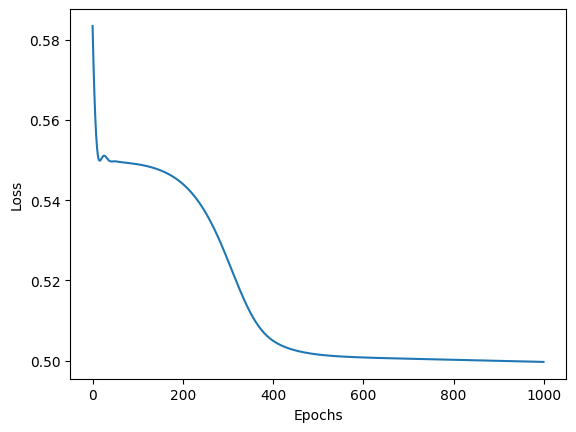

Training Losses are 
          0
0  0.599234
1  0.593325
2  0.587822
3  0.582727
4  0.578041
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2970   74]
 [ 879   77]]
Accuracy: 0.7618, Precision: 0.5099, Recall: 0.0805, F1-score: 0.1391

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2968   76]
 [ 874   82]]
Accuracy: 0.7625, Precision: 0.5190, Recall: 0.0858, F1-score: 0.1472



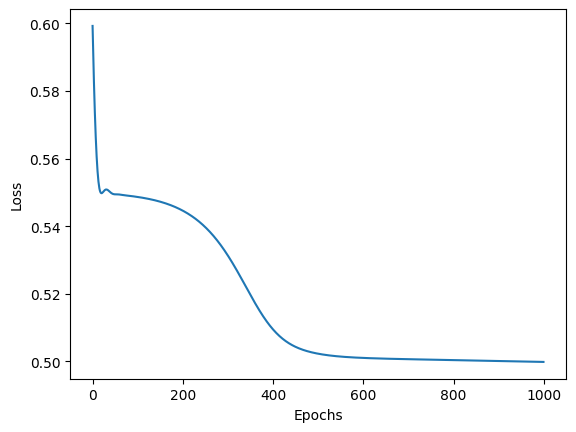

Training Losses are 
          0
0  0.731882
1  0.720121
2  0.708775
3  0.697852
4  0.687358
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2968   76]
 [ 876   80]]
Accuracy: 0.7620, Precision: 0.5128, Recall: 0.0837, F1-score: 0.1439

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2962   82]
 [ 875   81]]
Accuracy: 0.7608, Precision: 0.4969, Recall: 0.0847, F1-score: 0.1448



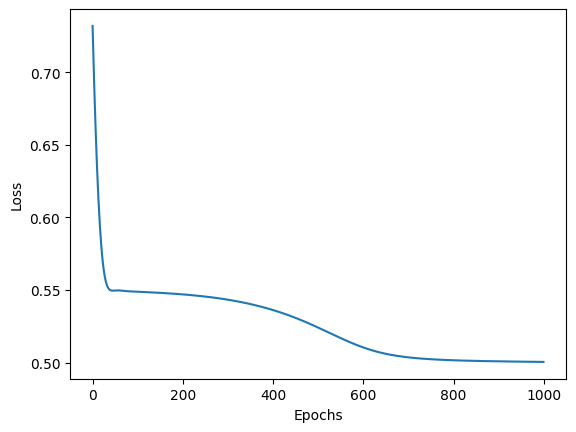

Training Losses are 
          0
0  0.739646
1  0.736184
2  0.732756
3  0.729364
4  0.726008
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


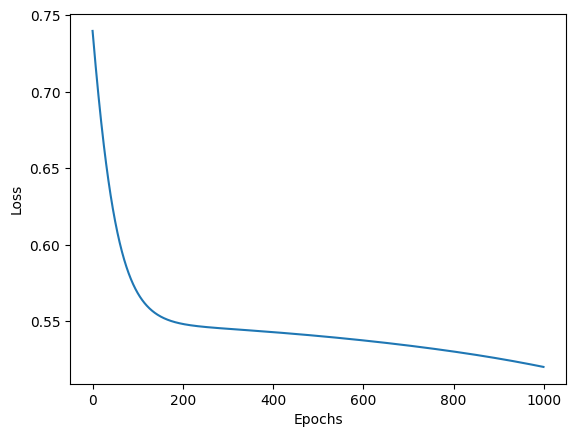

Training Losses are 
          0
0  0.579169
1  0.577831
2  0.576525
3  0.575254
4  0.574017
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2989   55]
 [ 902   54]]
Accuracy: 0.7608, Precision: 0.4954, Recall: 0.0565, F1-score: 0.1014

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2998   46]
 [ 905   51]]
Accuracy: 0.7622, Precision: 0.5258, Recall: 0.0533, F1-score: 0.0969



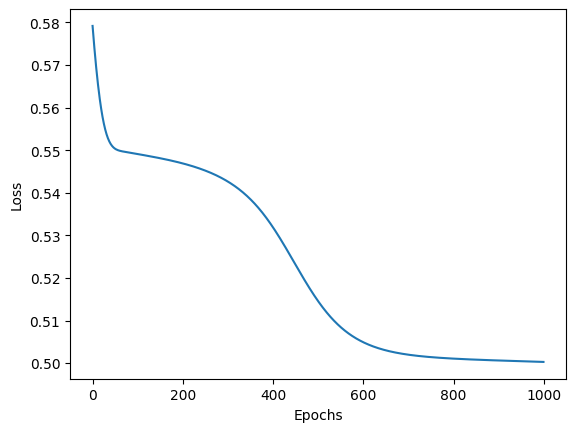

Training Losses are 
          0
0  0.579810
1  0.578569
2  0.577351
3  0.576158
4  0.574989
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2991   53]
 [ 903   53]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0554, F1-score: 0.0998

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3000   44]
 [ 906   50]]
Accuracy: 0.7625, Precision: 0.5319, Recall: 0.0523, F1-score: 0.0952



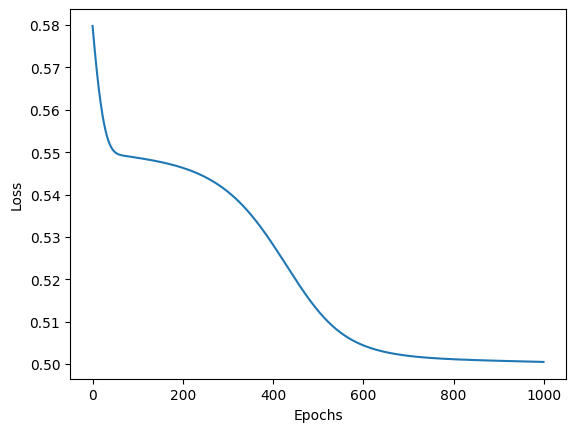

Training Losses are 
          0
0  0.764478
1  0.761032
2  0.757624
3  0.754255
4  0.750926
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


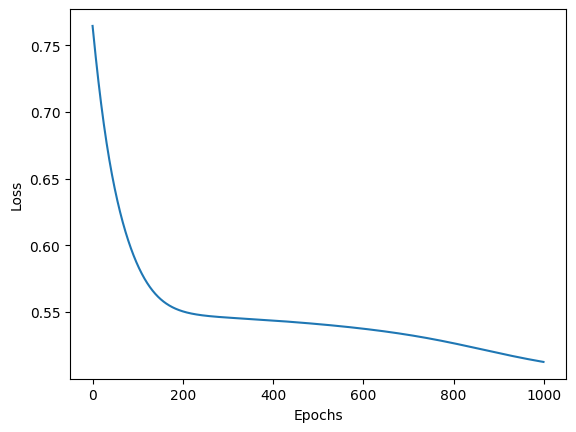

Training Losses are 
          0
0  0.571677
1  0.569983
2  0.568355
3  0.566793
4  0.565301
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2980   64]
 [ 892   64]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0669, F1-score: 0.1181

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2986   58]
 [ 896   60]]
Accuracy: 0.7615, Precision: 0.5085, Recall: 0.0628, F1-score: 0.1117



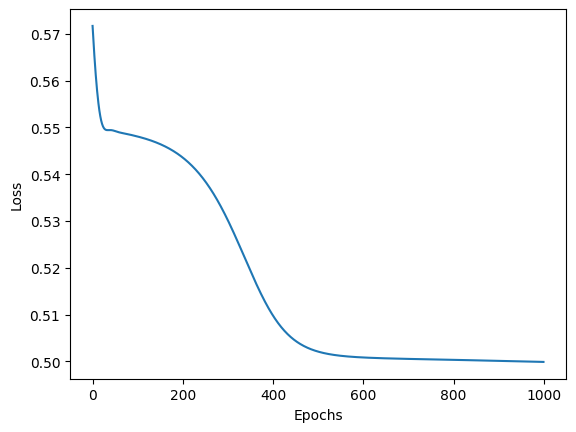

Training Losses are 
          0
0  0.801923
1  0.796086
2  0.790316
3  0.784616
4  0.778988
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3041    3]
 [ 953    3]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0031, F1-score: 0.0062

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3043    1]
 [ 952    4]]
Accuracy: 0.7618, Precision: 0.8000, Recall: 0.0042, F1-score: 0.0083



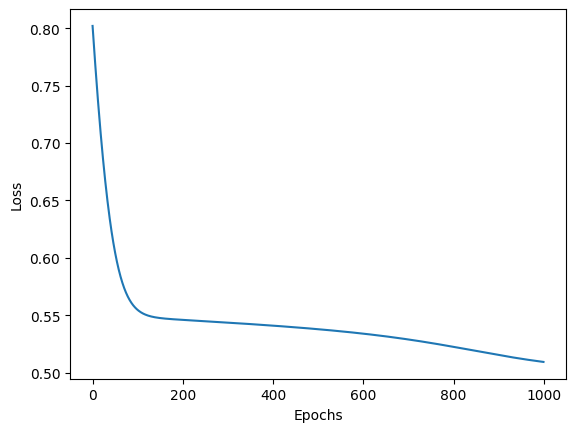

Training Losses are 
          0
0  0.607457
1  0.604974
2  0.602542
3  0.600161
4  0.597833
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2975   69]
 [ 888   68]]
Accuracy: 0.7608, Precision: 0.4964, Recall: 0.0711, F1-score: 0.1244

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2982   62]
 [ 891   65]]
Accuracy: 0.7618, Precision: 0.5118, Recall: 0.0680, F1-score: 0.1200



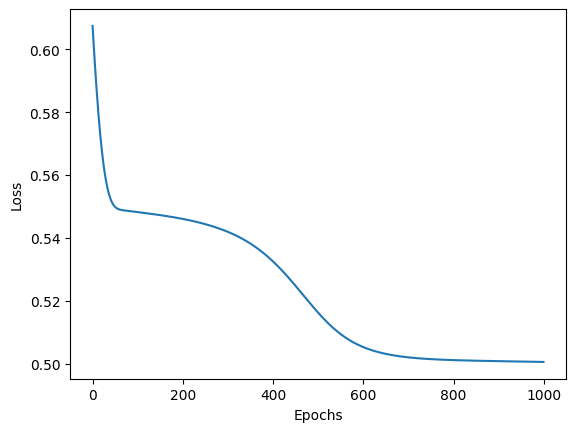

Training Losses are 
          0
0  0.740168
1  0.734494
2  0.728920
3  0.723447
4  0.718076
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3008   36]
 [ 911   45]]
Accuracy: 0.7632, Precision: 0.5556, Recall: 0.0471, F1-score: 0.0868

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3011   33]
 [ 915   41]]
Accuracy: 0.7630, Precision: 0.5541, Recall: 0.0429, F1-score: 0.0796



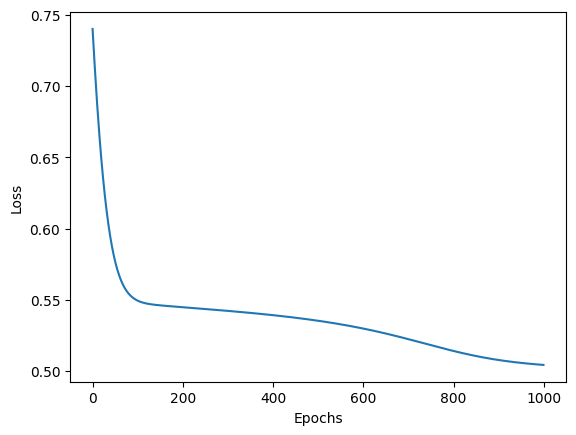

Training Losses are 
          0
0  0.735789
1  0.728076
2  0.720552
3  0.713220
4  0.706082
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2968   76]
 [ 876   80]]
Accuracy: 0.7620, Precision: 0.5128, Recall: 0.0837, F1-score: 0.1439

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2968   76]
 [ 876   80]]
Accuracy: 0.7620, Precision: 0.5128, Recall: 0.0837, F1-score: 0.1439



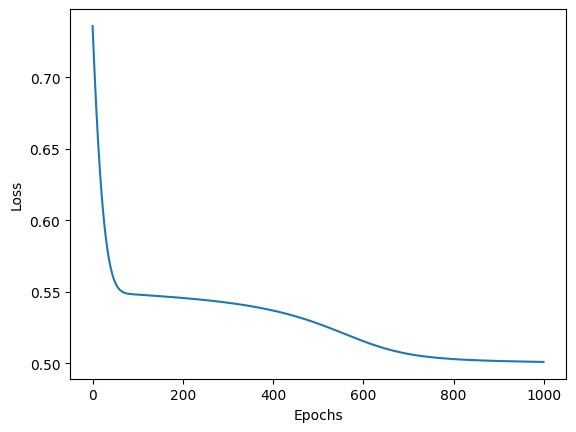

Training Losses are 
          0
0  0.742715
1  0.734294
2  0.726088
3  0.718099
4  0.710330
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2972   72]
 [ 880   76]]
Accuracy: 0.7620, Precision: 0.5135, Recall: 0.0795, F1-score: 0.1377

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2974   70]
 [ 886   70]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0732, F1-score: 0.1277



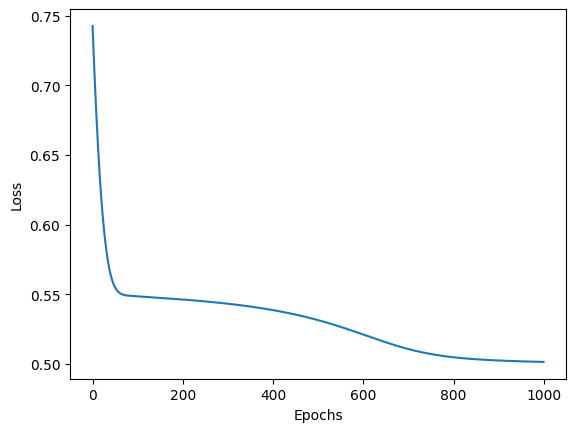

Training Losses are 
          0
0  0.676231
1  0.669219
2  0.662424
3  0.655848
4  0.649495
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2963   81]
 [ 874   82]]
Accuracy: 0.7612, Precision: 0.5031, Recall: 0.0858, F1-score: 0.1466

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2957   87]
 [ 865   91]]
Accuracy: 0.7620, Precision: 0.5112, Recall: 0.0952, F1-score: 0.1605



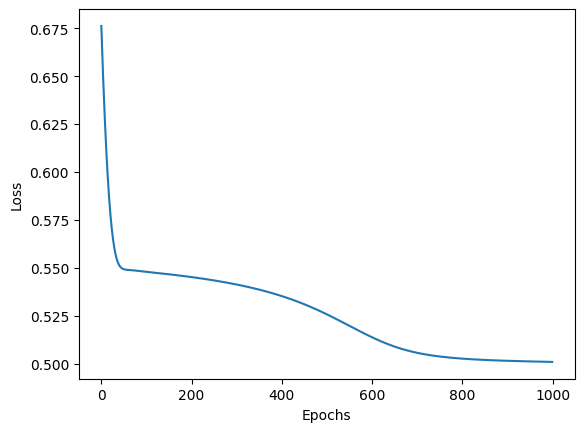

Training Losses are 
          0
0  0.739685
1  0.731075
2  0.722684
3  0.714513
4  0.706567
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2964   80]
 [ 873   83]]
Accuracy: 0.7618, Precision: 0.5092, Recall: 0.0868, F1-score: 0.1483

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2961   83]
 [ 869   87]]
Accuracy: 0.7620, Precision: 0.5118, Recall: 0.0910, F1-score: 0.1545



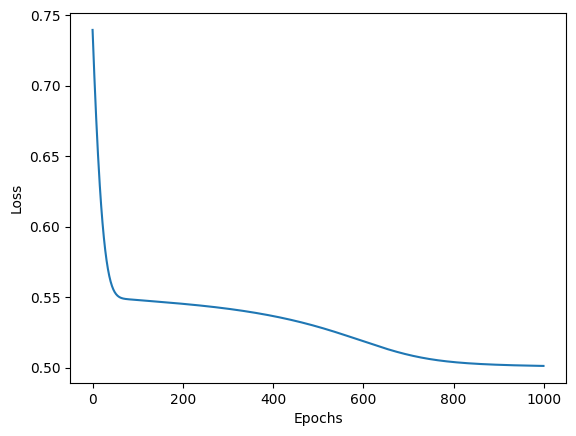

Training Losses are 
          0
0  0.584292
1  0.578568
2  0.573398
3  0.568786
4  0.564728
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2968   76]
 [ 878   78]]
Accuracy: 0.7615, Precision: 0.5065, Recall: 0.0816, F1-score: 0.1405

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2968   76]
 [ 876   80]]
Accuracy: 0.7620, Precision: 0.5128, Recall: 0.0837, F1-score: 0.1439



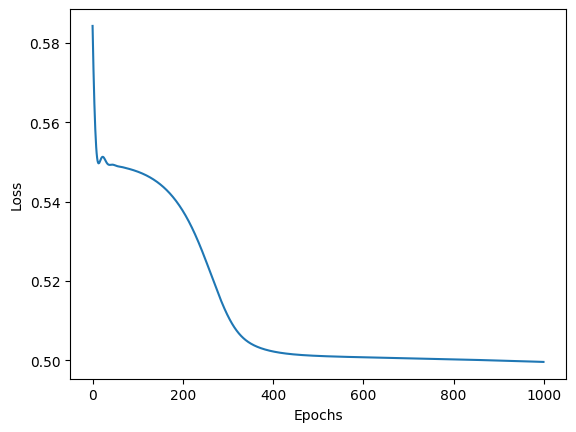

Training Losses are 
          0
0  0.743276
1  0.728495
2  0.714354
3  0.700862
4  0.688029
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2958   86]
 [ 870   86]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0900, F1-score: 0.1525

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2954   90]
 [ 862   94]]
Accuracy: 0.7620, Precision: 0.5109, Recall: 0.0983, F1-score: 0.1649



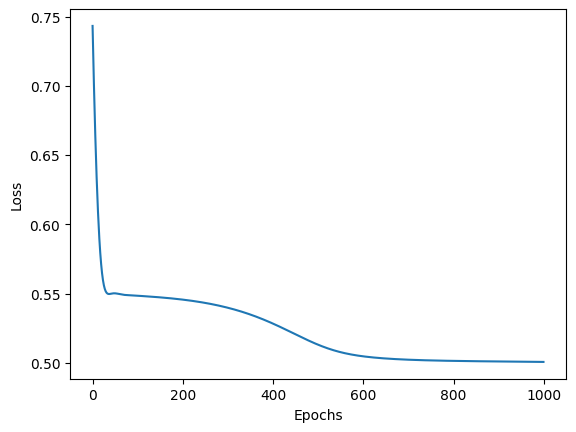

Training Losses are 
          0
0  0.792634
1  0.775944
2  0.759883
3  0.744465
4  0.729700
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2956   88]
 [ 871   85]]
Accuracy: 0.7602, Precision: 0.4913, Recall: 0.0889, F1-score: 0.1506

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2955   89]
 [ 859   97]]
Accuracy: 0.7630, Precision: 0.5215, Recall: 0.1015, F1-score: 0.1699



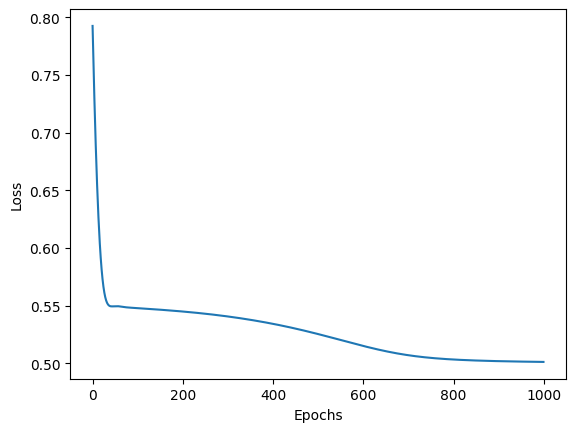

Training Losses are 
          0
0  0.665318
1  0.654087
2  0.643493
3  0.633540
4  0.624231
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2963   81]
 [ 874   82]]
Accuracy: 0.7612, Precision: 0.5031, Recall: 0.0858, F1-score: 0.1466

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2959   85]
 [ 866   90]]
Accuracy: 0.7622, Precision: 0.5143, Recall: 0.0941, F1-score: 0.1592



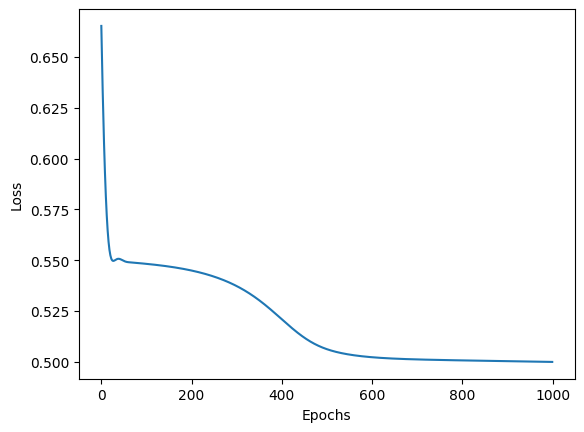

Training Losses are 
          0
0  0.623900
1  0.621224
2  0.618594
3  0.616012
4  0.613480
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3009   35]
 [ 918   38]]
Accuracy: 0.7618, Precision: 0.5205, Recall: 0.0397, F1-score: 0.0739

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3012   32]
 [ 917   39]]
Accuracy: 0.7628, Precision: 0.5493, Recall: 0.0408, F1-score: 0.0759



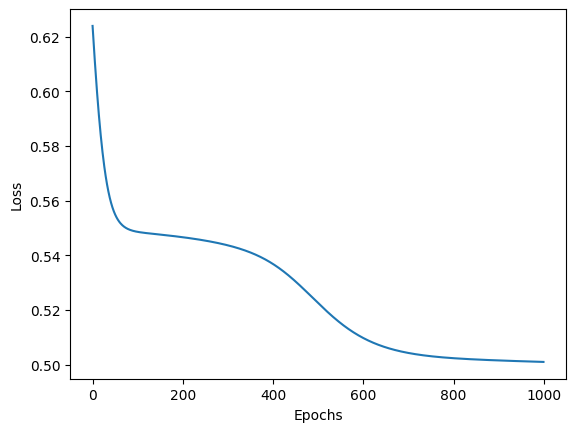

Training Losses are 
          0
0  0.676578
1  0.673260
2  0.669984
3  0.666751
4  0.663564
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2993   51]
 [ 903   53]]
Accuracy: 0.7615, Precision: 0.5096, Recall: 0.0554, F1-score: 0.1000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3000   44]
 [ 903   53]]
Accuracy: 0.7632, Precision: 0.5464, Recall: 0.0554, F1-score: 0.1007



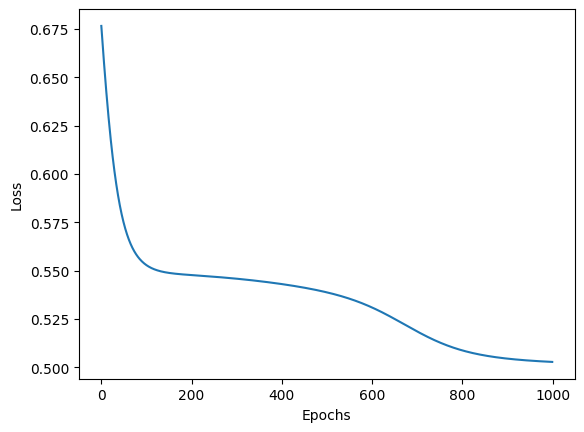

Training Losses are 
          0
0  0.701946
1  0.696793
2  0.691740
3  0.686792
4  0.681951
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3006   38]
 [ 914   42]]
Accuracy: 0.7620, Precision: 0.5250, Recall: 0.0439, F1-score: 0.0811

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3010   34]
 [ 914   42]]
Accuracy: 0.7630, Precision: 0.5526, Recall: 0.0439, F1-score: 0.0814



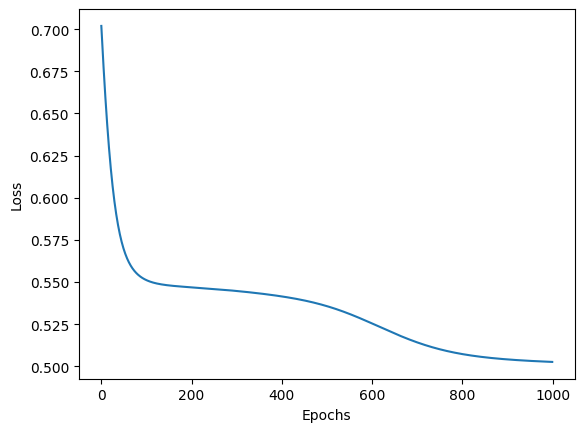

Training Losses are 
          0
0  0.650053
1  0.646269
2  0.642578
3  0.638982
4  0.635483
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2986   58]
 [ 899   57]]
Accuracy: 0.7608, Precision: 0.4957, Recall: 0.0596, F1-score: 0.1064

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2997   47]
 [ 901   55]]
Accuracy: 0.7630, Precision: 0.5392, Recall: 0.0575, F1-score: 0.1040



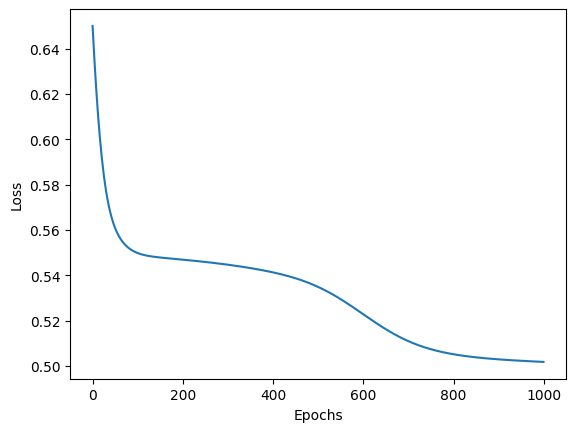

Training Losses are 
          0
0  0.683271
1  0.676661
2  0.670235
3  0.663997
4  0.657952
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2961   83]
 [ 873   83]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0868, F1-score: 0.1480

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2954   90]
 [ 863   93]]
Accuracy: 0.7618, Precision: 0.5082, Recall: 0.0973, F1-score: 0.1633



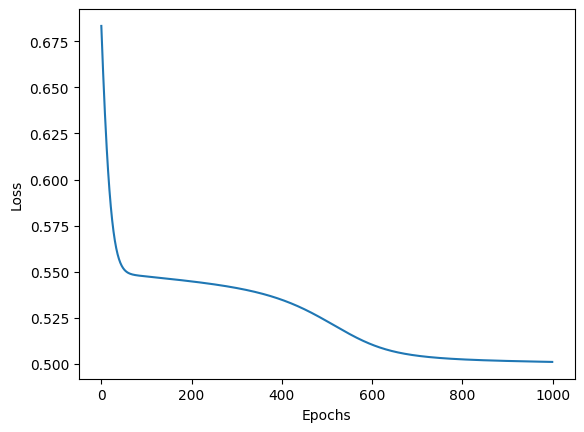

Training Losses are 
          0
0  0.657482
1  0.652583
2  0.647819
3  0.643192
4  0.638704
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2972   72]
 [ 882   74]]
Accuracy: 0.7615, Precision: 0.5068, Recall: 0.0774, F1-score: 0.1343

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2983   61]
 [ 887   69]]
Accuracy: 0.7630, Precision: 0.5308, Recall: 0.0722, F1-score: 0.1271



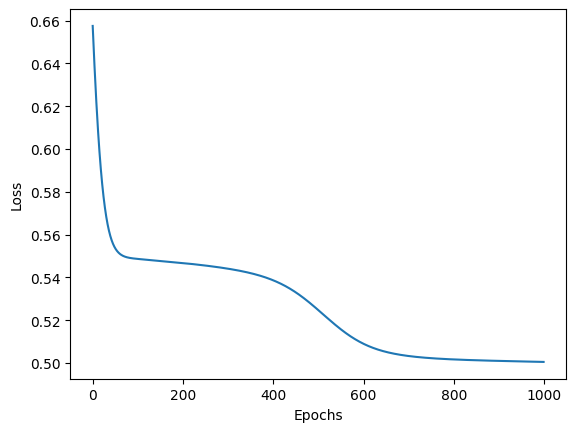

Training Losses are 
          0
0  0.684305
1  0.678486
2  0.672788
3  0.667216
4  0.661775
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2967   77]
 [ 875   81]]
Accuracy: 0.7620, Precision: 0.5127, Recall: 0.0847, F1-score: 0.1454

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2959   85]
 [ 872   84]]
Accuracy: 0.7608, Precision: 0.4970, Recall: 0.0879, F1-score: 0.1493



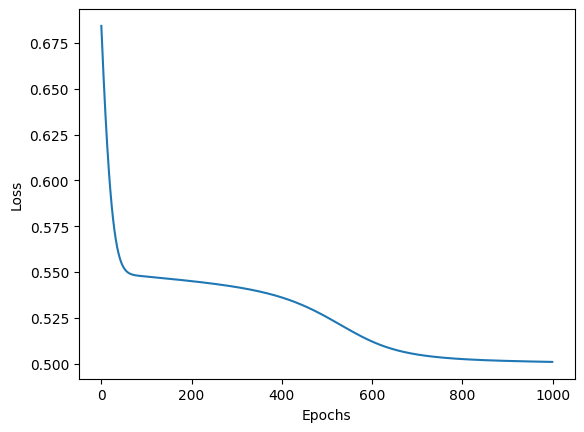

Training Losses are 
          0
0  0.681256
1  0.675337
2  0.669571
3  0.663962
4  0.658513
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2975   69]
 [ 882   74]]
Accuracy: 0.7622, Precision: 0.5175, Recall: 0.0774, F1-score: 0.1347

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2982   62]
 [ 888   68]]
Accuracy: 0.7625, Precision: 0.5231, Recall: 0.0711, F1-score: 0.1252



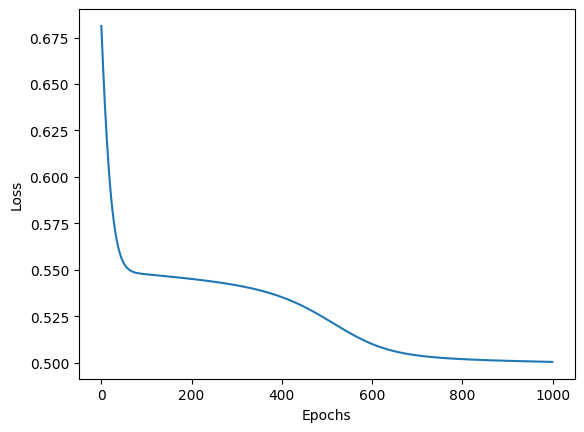

Training Losses are 
          0
0  0.737990
1  0.725291
2  0.713084
3  0.701378
4  0.690180
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2959   85]
 [ 873   83]]
Accuracy: 0.7605, Precision: 0.4940, Recall: 0.0868, F1-score: 0.1477

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2953   91]
 [ 861   95]]
Accuracy: 0.7620, Precision: 0.5108, Recall: 0.0994, F1-score: 0.1664



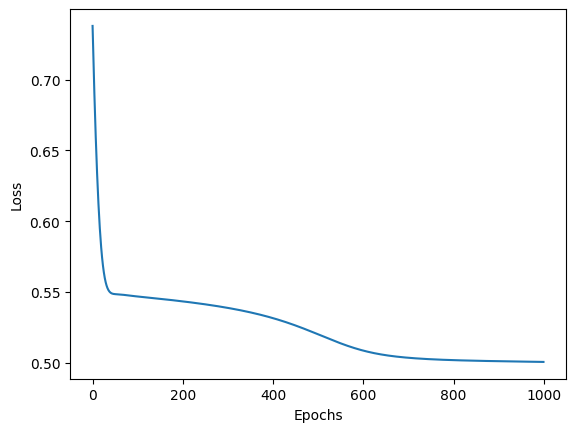

Training Losses are 
          0
0  0.683283
1  0.671845
2  0.660968
3  0.650661
4  0.640929
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2957   87]
 [ 870   86]]
Accuracy: 0.7608, Precision: 0.4971, Recall: 0.0900, F1-score: 0.1523

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2952   92]
 [ 857   99]]
Accuracy: 0.7628, Precision: 0.5183, Recall: 0.1036, F1-score: 0.1726



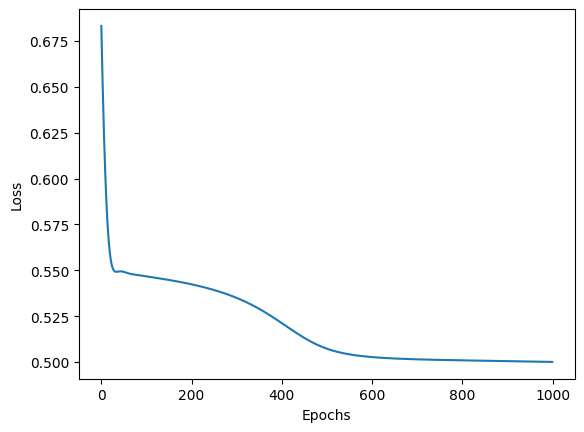

Training Losses are 
          0
0  0.600967
1  0.594754
2  0.588974
3  0.583630
4  0.578724
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2971   73]
 [ 882   74]]
Accuracy: 0.7612, Precision: 0.5034, Recall: 0.0774, F1-score: 0.1342

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2972   72]
 [ 876   80]]
Accuracy: 0.7630, Precision: 0.5263, Recall: 0.0837, F1-score: 0.1444



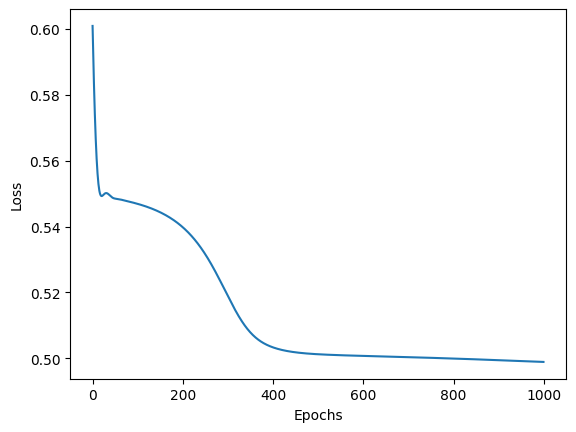

Training Losses are 
          0
0  0.686438
1  0.675615
2  0.665289
3  0.655468
4  0.646157
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2954   90]
 [ 866   90]]
Accuracy: 0.7610, Precision: 0.5000, Recall: 0.0941, F1-score: 0.1585

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2951   93]
 [ 855  101]]
Accuracy: 0.7630, Precision: 0.5206, Recall: 0.1056, F1-score: 0.1757



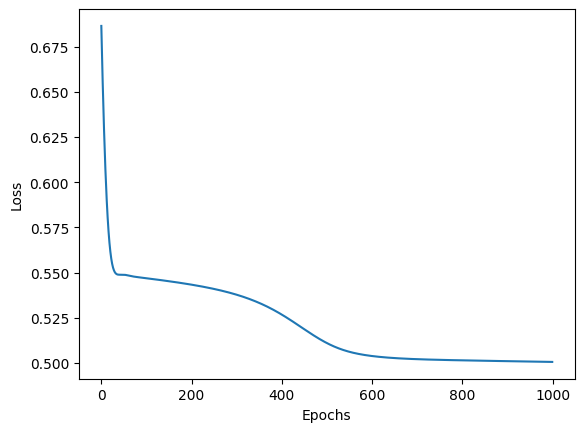

Training Losses are 
          0
0  0.682343
1  0.666214
2  0.651199
3  0.637315
4  0.624570
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2955   89]
 [ 870   86]]
Accuracy: 0.7602, Precision: 0.4914, Recall: 0.0900, F1-score: 0.1521

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2952   92]
 [ 858   98]]
Accuracy: 0.7625, Precision: 0.5158, Recall: 0.1025, F1-score: 0.1710



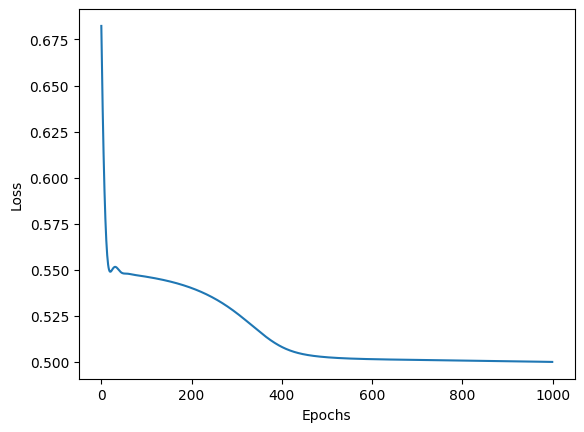

Training Losses are 
          0
0  0.704402
1  0.687975
2  0.672535
3  0.658099
4  0.644675
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2969   75]
 [ 877   79]]
Accuracy: 0.7620, Precision: 0.5130, Recall: 0.0826, F1-score: 0.1423

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2964   80]
 [ 873   83]]
Accuracy: 0.7618, Precision: 0.5092, Recall: 0.0868, F1-score: 0.1483



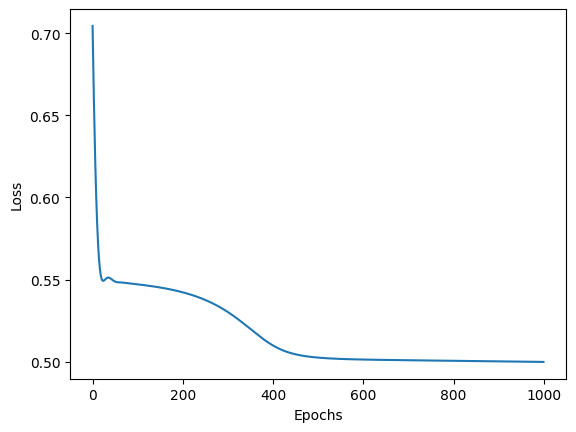

Training Losses are 
          0
0  0.681232
1  0.665648
2  0.651105
3  0.637626
4  0.625222
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2957   87]
 [ 871   85]]
Accuracy: 0.7605, Precision: 0.4942, Recall: 0.0889, F1-score: 0.1507

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2954   90]
 [ 858   98]]
Accuracy: 0.7630, Precision: 0.5213, Recall: 0.1025, F1-score: 0.1713



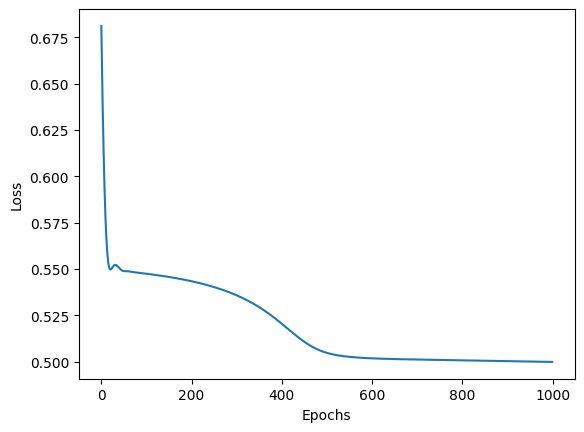

Training Losses are 
          0
0  0.666845
1  0.651607
2  0.637519
3  0.624591
4  0.612826
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2962   82]
 [ 873   83]]
Accuracy: 0.7612, Precision: 0.5030, Recall: 0.0868, F1-score: 0.1481

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2956   88]
 [ 863   93]]
Accuracy: 0.7622, Precision: 0.5138, Recall: 0.0973, F1-score: 0.1636



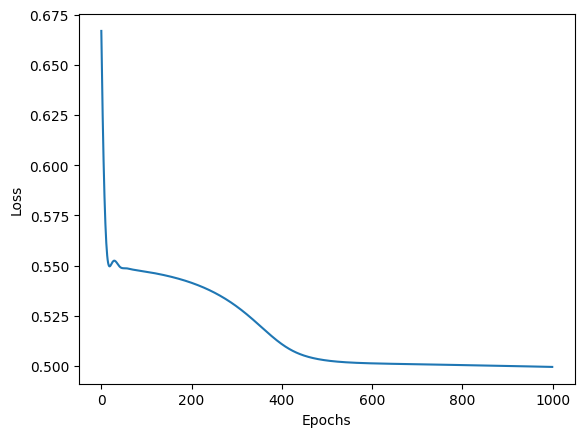

The best accuracy on test data is 0.7635 for layers 8 , 16, 64


In [17]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(10,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")